In [25]:
import pandas as pd 
import numpy as np


from sklearn    import datasets         as ds
from sklearn    import model_selection  as ms
from sklearn    import linear_model     as lm
from sklearn    import metrics          as mt
from matplotlib import pyplot           as plt

In [26]:
# Generate duas classes dataset de dados sinteticos
X, y = ds.make_classification(n_samples=1000, n_classes=2, random_state=1)

df = pd.DataFrame( X )

df.shape

(1000, 20)

In [27]:
# Split training and test dataset
X_train , X_test, y_train, y_test = ms.train_test_split( X, y, test_size=0.2)

In [42]:
# Define
model = lm.LogisticRegression( solver='lbfgs')

# Train
model.fit( X_train, y_train )

# Performace
yhat_test = model.predict_proba( X_test)

# Define quais das classes quer trabalhar
yhat_test = yhat_test[:,1]
yhat_test

array([9.16088331e-01, 8.15013595e-01, 9.92840029e-01, 2.62809179e-04,
       7.95007212e-01, 2.52059911e-01, 5.48192044e-03, 5.19283742e-01,
       9.39331231e-01, 3.98180457e-01, 6.19050211e-01, 5.22539875e-02,
       7.68079268e-01, 7.76188604e-01, 5.03121873e-01, 8.32182176e-01,
       3.25847041e-01, 7.65764928e-01, 8.05473892e-01, 9.99285886e-01,
       9.07364221e-01, 9.61444564e-01, 8.51893208e-01, 2.45035955e-02,
       9.38750664e-01, 8.10758893e-01, 1.63354098e-02, 3.73863945e-02,
       1.53135686e-01, 6.69495535e-02, 6.14488413e-02, 8.77504302e-01,
       9.85434739e-01, 3.05617342e-01, 7.87993059e-01, 4.01334125e-01,
       8.08047410e-01, 8.34362397e-01, 4.38334168e-01, 8.97921429e-01,
       1.70194196e-02, 9.15929402e-01, 7.32085642e-02, 7.34809603e-01,
       2.04876497e-01, 8.72111804e-01, 9.26060077e-01, 8.66120012e-01,
       9.51752179e-01, 9.96027109e-03, 2.39971295e-01, 9.95674425e-01,
       2.05516673e-02, 8.36792461e-01, 5.82426826e-02, 1.14758549e-01,
      

In [43]:
th = 0.62

yhat_test = [ 1 if i > th else 0 for i in yhat_test]
yhat_test

[1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0]

In [29]:
# metrics curve
fpr, tpr, thresholds = mt.roc_curve(y_test, yhat_test)

Text(0, 0.5, 'True Positive Rate')

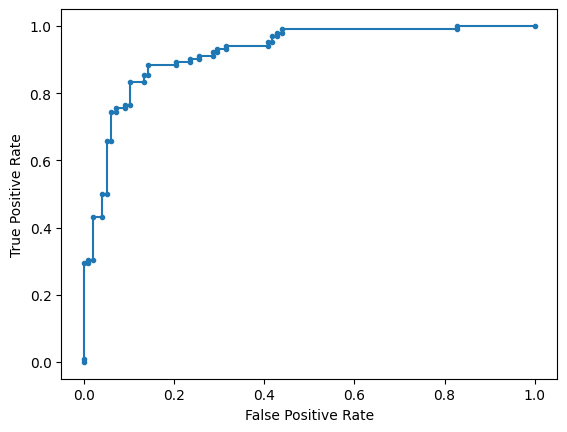

In [38]:
plt.plot(fpr, tpr, marker='.')
plt.xlabel( 'False Positive Rate')
plt.ylabel( 'True Positive Rate')

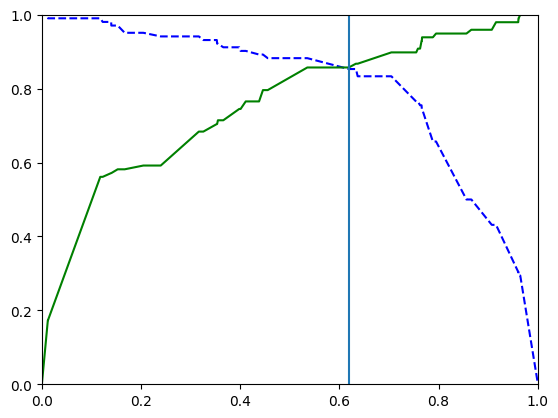

In [37]:
plt.plot( thresholds, tpr, 'b--', label='TPR' )# aumento de true posite
plt.plot( thresholds, 1-fpr, 'g-', label='TPR' )# diminuicao de false positve -1
plt.xlim( [0, 1] )
plt.ylim( [0, 1] )
plt.vlines(0.62, 0, 1)# vertical lines plotar 0.45 e vai de 0 á 1 / 1 th de 0,62 ele faz meu tpr ser max e o meu fpr ser min
